In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("loan_data.csv")

In [3]:
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [5]:
df['loan_int_rate'].corr(df['credit_score'])

np.float64(0.011497752329653641)

In [6]:
df['loan_percent_income'].corr(df['credit_score'])

np.float64(-0.01148309587117947)

In [7]:
df=df.drop( columns='loan_int_rate')

In [8]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
df['loan_status'].value_counts()


loan_status
0    35000
1    10000
Name: count, dtype: int64

In [10]:
df=df.drop_duplicates()

In [11]:
cat_columns=df.select_dtypes(include=['object']).columns

In [12]:
print(cat_columns)

Index(['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent', 'previous_loan_defaults_on_file'],
      dtype='object')


In [13]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

ohe = OneHotEncoder(sparse_output=False)

# Use actual data: df[cat_columns]
encoded = ohe.fit_transform(df[cat_columns])

# Create DataFrame with correct column names
df_ohe = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(cat_columns))




In [14]:
df_1=df.drop(columns=cat_columns)

In [15]:
df_encoded=pd.concat([df_ohe,df_1],axis=1)

In [16]:
df_encoded

,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,22.0,71948.0,0,35000.0,0.49,3.0,561,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,21.0,12282.0,0,1000.0,0.08,2.0,504,0
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,25.0,12438.0,3,5500.0,0.44,3.0,635,1
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,23.0,79753.0,0,35000.0,0.44,2.0,675,1
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,24.0,66135.0,1,35000.0,0.53,4.0,586,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,27.0,47971.0,6,15000.0,0.31,3.0,645,1
44996,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,37.0,65800.0,17,9000.0,0.14,11.0,621,1
44997,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,33.0,56942.0,7,2771.0,0.05,10.0,668,1
44998,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,29.0,33164.0,4,12000.0,0.36,6.0,604,1


In [17]:
X=df_encoded.drop(columns='loan_status')
Y=df_encoded['loan_status']

In [18]:
df_encoded['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [19]:

from imblearn.over_sampling import SMOTE
print("SMOTE imported successfully!")


SMOTE imported successfully!


In [20]:
from imblearn.over_sampling import SMOTE

In [21]:
sm=SMOTE(random_state=42)
X_resampled,Y_reampled=sm.fit_resample(X,Y)

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,Y_train,Y_test=train_test_split(X_resampled,Y_reampled,test_size=0.2,random_state=42)

In [23]:
xgbmodel=XGBClassifier(
    best_params_accuracy = {
    'n_estimators': 400,
    'max_depth': 5,
    'learning_rate': 0.05,
    'subsample': 1,
    'colsample_bytree': 1,
    'gamma': 0,
    'min_child_weight': 1,
    'reg_alpha': 0.0,
    'reg_lambda': 1.0,
    'eval_metric': 'auc',
    'random_state': 42
}

)

In [24]:
xgbmodel.fit(X_train,Y_train)
Y_pred=xgbmodel.predict(X_test)

c:\Users\pallavi\frontend\.venv\Lib\site-packages\xgboost\training.py:199: UserWarning: [22:45:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "best_params_accuracy" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [25]:
print("Accuracy",accuracy_score(Y_test,Y_pred)*100)

Accuracy 93.82142857142857


In [26]:
from sklearn.metrics import roc_auc_score

# y_test = true labels
# y_prob = predicted probabilities for positive class (not 0/1)
y_prob = xgbmodel.predict_proba(X_test)[:, 1]  # positive class probability

roc_accu = roc_auc_score(Y_test, y_prob)
print("ROC-AUC:", roc_accu)


ROC-AUC: 0.9888640634508075


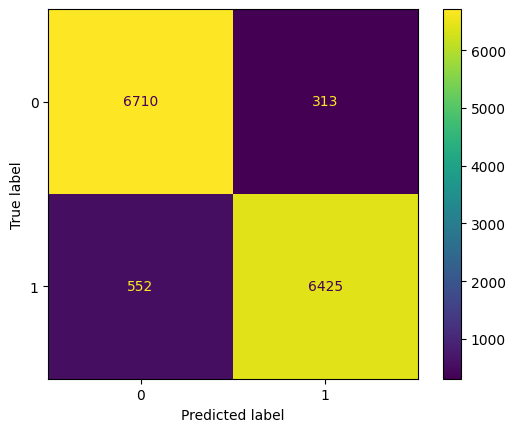

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = xgbmodel.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


In [28]:
from sklearn.metrics import classification_report

print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7023
           1       0.95      0.92      0.94      6977

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [29]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

param_dist = {
    'n_estimators': [200, 300, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1],
    'colsample_bytree': [0.7, 0.8, 1],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
}

model = XGBClassifier()
rs = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring='f1')
rs.fit(X_train, Y_train)
print(rs.best_params_)


{'subsample': 0.7, 'n_estimators': 500, 'min_child_weight': 1, 'max_depth': 6, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}


In [30]:
best_params = rs.best_params_


In [31]:
best_model = XGBClassifier(**best_params)
best_model.fit(X_train, Y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=1, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=500,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

print("Accuracy:", accuracy_score(Y_test, y_pred))
print("ROC-AUC:", roc_auc_score(Y_test, y_pred_proba))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 0.9388571428571428
ROC-AUC: 0.9890482695211138
[[6699  324]
 [ 532 6445]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7023
           1       0.95      0.92      0.94      6977

    accuracy                           0.94     14000
   macro avg       0.94      0.94      0.94     14000
weighted avg       0.94      0.94      0.94     14000



In [34]:
import pickle

with open("loan_model.pkl", "wb") as f:
    pickle.dump(model, f)


In [35]:
X_train

,person_gender_female,person_gender_male,person_education_Associate,person_education_Bachelor,person_education_Doctorate,person_education_High School,person_education_Master,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,previous_loan_defaults_on_file_No,previous_loan_defaults_on_file_Yes,person_age,person_income,person_emp_exp,loan_amnt,loan_percent_income,cb_person_cred_hist_length,credit_score
47339,0.456847,0.543153,0.0,0.0,0.0,0.456847,0.543153,0.456847,0.0,0.0,...,0.000000,1.0,0.0,29.111622,121691.003303,6,7498.734218,0.060000,4.456847,600
67456,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.377437,0.0,0.0,...,0.622563,1.0,0.0,28.112814,31605.877397,6,12000.000000,0.380000,6.980502,616
12308,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,1.0,0.0,22.000000,38690.000000,0,12000.000000,0.310000,2.000000,578
32557,0.000000,1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,1.0,0.0,69.000000,29668.000000,45,6000.000000,0.200000,23.000000,724
664,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,1.0,0.0,22.000000,25537.000000,0,6000.000000,0.230000,4.000000,623
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37194,0.000000,1.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.0,0.0,...,0.000000,1.0,0.0,25.000000,25109.000000,2,3600.000000,0.140000,4.000000,641
6265,0.000000,1.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.0,1.0,26.000000,37091.000000,5,6000.000000,0.160000,3.000000,543
54886,0.151240,0.848760,0.0,0.0,0.0,0.151240,0.848760,0.000000,0.0,0.0,...,0.000000,1.0,0.0,26.697519,61174.830619,3,5575.620148,0.091512,6.243799,544
860,0.000000,1.000000,0.0,0.0,0.0,0.000000,1.000000,0.000000,0.0,0.0,...,0.000000,1.0,0.0,26.000000,178602.000000,6,20000.000000,0.110000,3.000000,604


In [36]:
Y_train

47339    1
67456    1
12308    1
32557    0
664      0
        ..
37194    0
6265     0
54886    1
860      1
15795    0
Name: loan_status, Length: 56000, dtype: int64

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from xgboost import XGBClassifier
import joblib


numeric_features = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score"
]

categorical_features = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file"
]

preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)


xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)


pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# =========================
# TRAIN & SAVE
# =========================
X_train = df.drop(columns=["loan_status"])
Y_train = df["loan_status"]

pipeline.fit(X_train, Y_train)




joblib.dump(pipeline, "loan_pipeline.pkl")




['loan_pipeline.pkl']

In [38]:
print(df.columns)  # Check all column names


Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'person_emp_exp', 'person_home_ownership', 'loan_amnt', 'loan_intent',
       'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')


In [39]:
import pandas as pd

df = pd.read_csv("loan_data.csv")
print(df.head())  # Preview the first 5 rows


   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

In [40]:
X_train = df.drop(columns=["loan_status"])
Y_train = df["loan_status"]


In [41]:
X_train.columns = X_train.columns.str.strip()  # remove leading/trailing spaces
X_train.columns = X_train.columns.str.replace("\u200b", "")  # remove zero-width spaces


In [42]:
# Check for missing feature columns
all_features = numeric_features + categorical_features
missing_cols = [col for col in all_features if col not in X_train.columns]
print("Missing feature columns:", missing_cols)


Missing feature columns: []


In [45]:
# =========================
# loan_pipeline_train.py
# =========================

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier
import joblib

# -------------------------
# 1️⃣ Load your dataset
# -------------------------
df = pd.read_csv("loan_data.csv")  # Replace with your actual dataset file

# Target column
target = "loan_status"  # Replace with your target column

# Features
numeric_features = [
    "person_age",
    "person_income",
    "person_emp_exp",
    "loan_amnt",
    "loan_percent_income",
    "cb_person_cred_hist_length",
    "credit_score"
]

categorical_features = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file"
]

X = df[numeric_features + categorical_features]
y = df[target]

# -------------------------
# 2️⃣ Train-test split
# -------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------
# 3️⃣ Preprocessing
# -------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# -------------------------
# 4️⃣ XGBoost model
# -------------------------
xgb_model = XGBClassifier(
    n_estimators=300,
    max_depth=5,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric="logloss"
)

# -------------------------
# 5️⃣ Create pipeline
# -------------------------
pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("model", xgb_model)
])

# -------------------------
# 6️⃣ Train the pipeline
# -------------------------
pipeline.fit(X_train, y_train)

# -------------------------
# 7️⃣ Save the pipeline
# -------------------------
joblib.dump(pipeline, "loan_pipeline.pkl")
print("Pipeline saved as loan_pipeline.pkl ✅")


Pipeline saved as loan_pipeline.pkl ✅
